<a href="https://colab.research.google.com/github/Juddt/Projet-Python-DAVROUX-DIDENOT/blob/main/Projet_python_DAVROUX_DIDENOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install yfinance


Nous utilisons la bibliothèque Python yfinance pour extraire des données boursières en temps réel. Cette méthode nous permet de récupérer des prix actualisés toutes les 5 minutes (Consigne 1) via une interface simplifiée de web scraping (Consigne 2)

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


Apple car c'est l'actif avec la plus grande capitalisation boursière, ce qui garantit une liquidité parfaite pour vos tests en temps réel.

In [33]:
def get_price( ticker) :
    ticker= yf.Ticker( ticker)
    price=ticker.fast_info[ "last_price"]
    return price

def get_currency(ticker) :
    ticker=yf.Ticker(ticker)
    currency =ticker.fast_info[ "currency" ]
    return currency


ticker_appl= "AAPL"
aapl_price= get_price(ticker_appl)
aapl_currency = get_currency(ticker_appl)
print("Asset : ", ticker_appl )
print(f"Current price :  {aapl_price:.2f} ")
print(f"Devise :  {aapl_currency}")



Asset :  AAPL
Current price :  267.26 
Devise :  USD


In [34]:
data = yf.download(
    ticker_appl,
    period="1mo",
    interval="5m"
)


/tmp/ipython-input-4236326794.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


In [35]:
data_clean = data["Close"].reset_index()
data_clean.columns = ["Datetime", "Close"]

data_clean.head()


,Datetime,Close
0,2025-12-08 14:30:00+00:00,279.130005
1,2025-12-08 14:35:00+00:00,277.679993
2,2025-12-08 14:40:00+00:00,277.890015
3,2025-12-08 14:45:00+00:00,277.829987
4,2025-12-08 14:50:00+00:00,277.739990


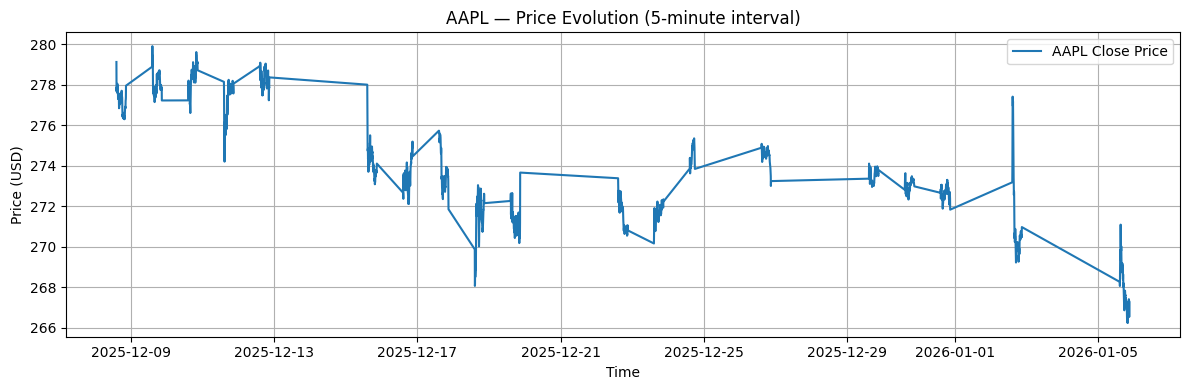

In [36]:
plt.figure(figsize=(12, 4))

plt.plot(
    data_clean["Datetime"],
    data_clean["Close"],
    label="AAPL Close Price"
)

plt.title("AAPL — Price Evolution (5-minute interval)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [37]:
differents_timeframes = {
    "Court terme (1 mois)":   {"period": "1mo", "interval": "5m" ,"sma_window": 78 ,"rsi_window": 7, "rsi_low":30 ,"rsi_high":70} ,
    "Moyen terme (6 mois)":   {"period": "6mo", "interval": "1h", "sma_window": 21,"rsi_window": 14,"rsi_low": 40 , "rsi_high": 60},
    "Long terme (1 an)":      {"period": "1y",  "interval": "1d", "sma_window": 20 , "rsi_window": 30, "rsi_low":45,"rsi_high": 55} }

# selected_view = "Long terme (1 an)"
selected_view= "Moyen terme (6 mois)"


params = differents_timeframes[selected_view]
# params2 = differents_timeframes[selected_view2]

data = yf.download(
    ticker_appl,
    period=params["period"],
    interval=params["interval"],
    progress=False )

# data2 = yf.download(
#     ticker_appl,
#     period=params2["period"],
#     interval=params2["interval"],
#     progress=False )


prices_aapl = data["Close"].reset_index()
prices_aapl.columns = ["Datetime", "Close"]

# prices_aapl2 = data2["Close"].reset_index()
# prices_aapl2.columns = ["Datetime", "Close"]

/tmp/ipython-input-1024520015.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


In [38]:
# plt.figure(figsize=(12, 4))
# plt.plot(data_clean["Datetime"], data_clean["Close"], label="AAPL Close Price")
# plt.title(f"AAPL — {selected_view}")
# plt.xlabel("Time")
# plt.ylabel("Price (USD)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(12, 4))
# plt.plot(prices_aapl2["Datetime"], prices_aapl2["Close"], label="AAPL Close Price")
# plt.title(f"AAPL — {selected_view2}")
# plt.xlabel("Time")
# plt.ylabel("Price (USD)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



In [39]:
#strategy 1 Buy and hold

# calcule des rendements
prices_aapl["Return"] = prices_aapl["Close"].pct_change()

initial_capital = 200
# initial_capital2 = 200

prices_aapl["Buy and Hold"] = ( (1 + prices_aapl["Return"].fillna(0)).cumprod() * initial_capital)


# strategie12= "Buy and Hold2"
# prices_aapl["Buy and Hold2"] =  (1 + prices_aapl["Return"].fillna(0)).cumprod() * initial_capital2
# prices_aapl.head()

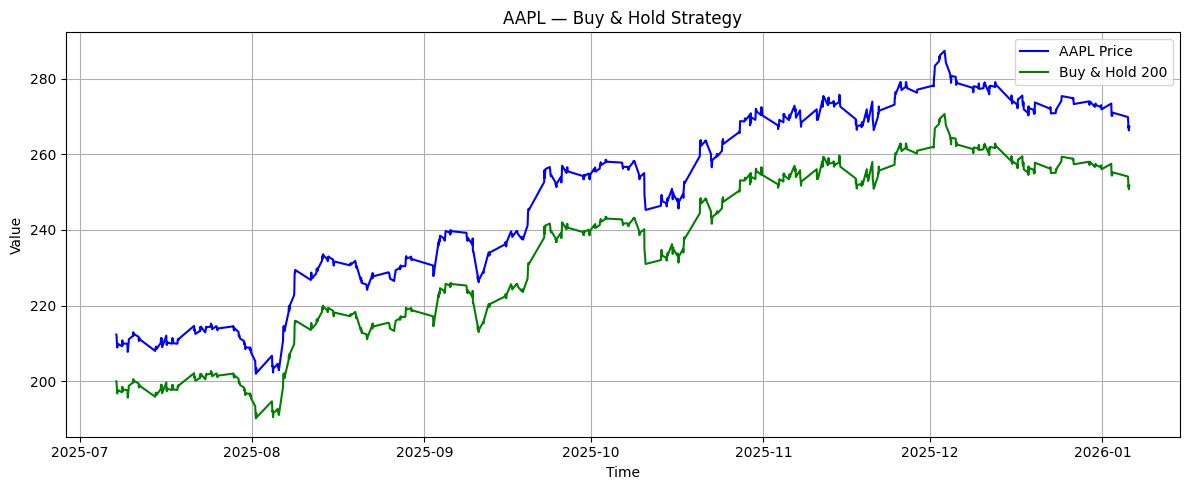

In [40]:
plt.figure(figsize=(12, 5))

# Courbe du prix
plt.plot(
    prices_aapl["Datetime"],
    prices_aapl["Close"],
    label="AAPL Price",
    color="blue"
)

# Courbe Buy & Hold
plt.plot(
    prices_aapl["Datetime"],
    prices_aapl["Buy and Hold"],
    label=f"Buy & Hold {initial_capital}",
    color="green"
)

# # Courbe Buy & Hold2
# plt.plot(
#     prices_aapl["Datetime"],
#     prices_aapl["Buy and Hold2"],
#     label=f"Buy & Hold {initial_capital2}",
#     color="red"
# )

plt.title("AAPL — Buy & Hold Strategy")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


analyse whatsapp


In [41]:
#strategy 2 SMA and RSI

# computing the moving averave
window = params["sma_window"]
prices_aapl["SMA"] = prices_aapl["Close"].rolling(window=window).mean()

# we invest if price is superior than sma price
prices_aapl["SMA_Position"] = ( prices_aapl["Close"] > prices_aapl["SMA"] ).astype(int)

#  Décalage de la position (évite le look-ahead bias)
prices_aapl["SMA_Position_Shifted"] = ( prices_aapl["SMA_Position"].shift(1).fillna(0))

# Performance de la stratégie SMA
prices_aapl["SMA_Strategy"] = ((1 + prices_aapl["Return"] * prices_aapl["SMA_Position_Shifted"]).fillna(1).cumprod()* initial_capital)

# # Vérification
# prices_aapl[[
#     "Datetime",
#     "Close",
#     "SMA",
#     "SMA_Position",
#     "SMA_Position_Shifted",
#     "SMA_Strategy"
# ]].head(30)


To avoid look-ahead bias, trading positions are shifted by one period so that decisions rely strictly on past information.

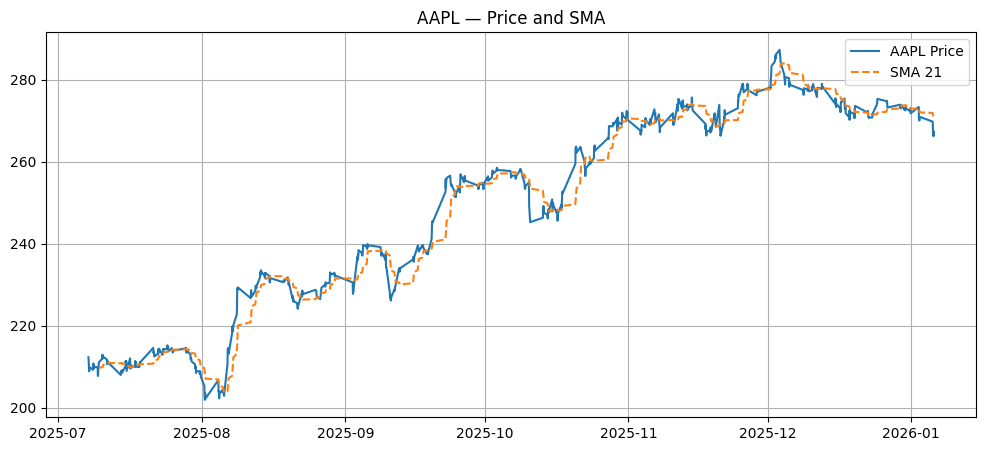

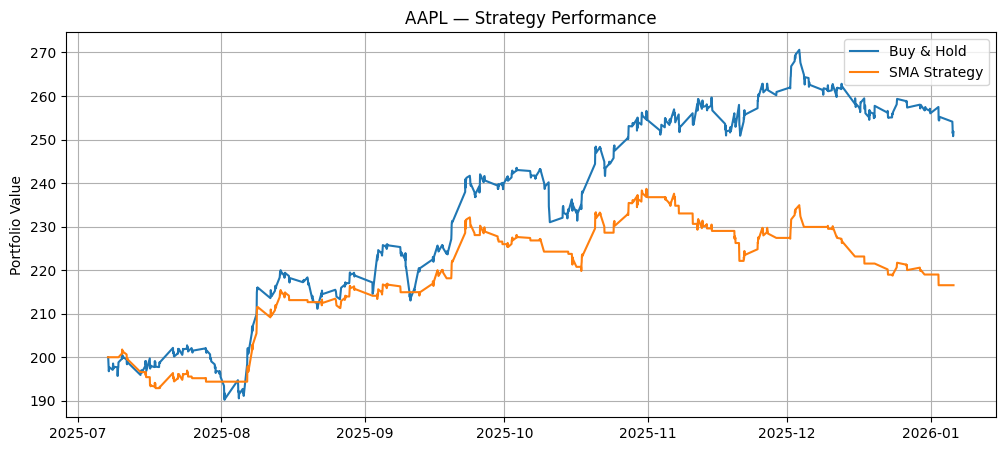

In [42]:


plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Close"], label="AAPL Price")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA"], label=f"SMA {params["sma_window"]}", linestyle="--")
plt.title("AAPL — Price and SMA")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Buy and Hold"], label="Buy & Hold")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA_Strategy"], label="SMA Strategy")
plt.title("AAPL — Strategy Performance")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# strategie 3 : RSI

def compute_rsi(price_series, window):
    delta = price_series.diff()

    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


prices_aapl["RSI"] = compute_rsi( prices_aapl["Close"],  params["rsi_window"])



prices_aapl["RSI_Position"] = 0
prices_aapl.loc[prices_aapl["RSI"] < 30, "RSI_Position"] = 1
prices_aapl.loc[prices_aapl["RSI"] > 70, "RSI_Position"] = 0

prices_aapl["RSI_Position_Shifted"] = (
    prices_aapl["RSI_Position"].shift(1).fillna(0)
)



prices_aapl["RSI_Strategy"] = (
    (1 + prices_aapl["Return"] * prices_aapl["RSI_Position_Shifted"])
    .fillna(1)
    .cumprod()
    * initial_capital
)


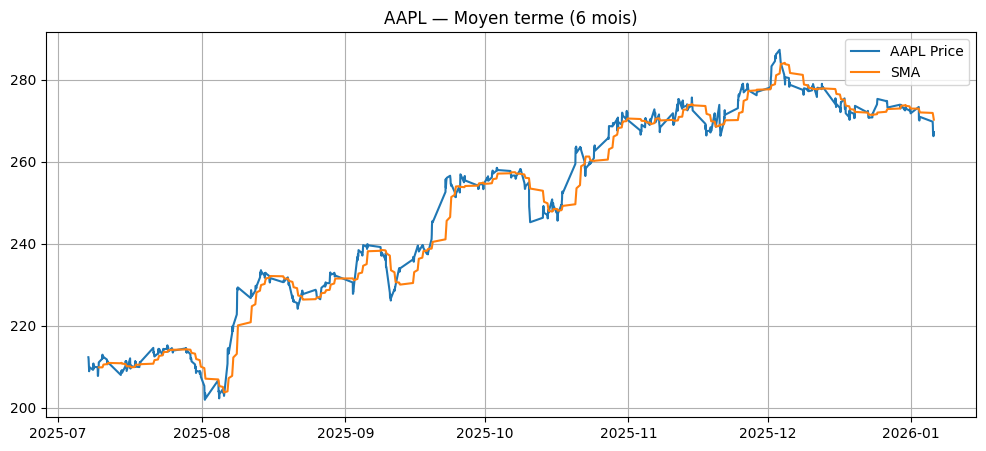

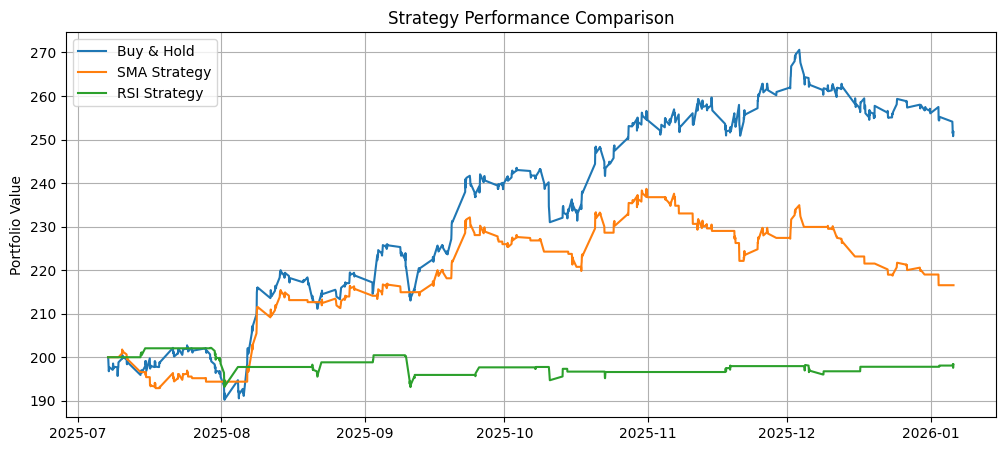

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Close"], label="AAPL Price")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA"], label="SMA")
plt.title(f"AAPL — {selected_view}")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Buy and Hold"], label="Buy & Hold")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA_Strategy"], label="SMA Strategy")
plt.plot(prices_aapl["Datetime"], prices_aapl["RSI_Strategy"], label="RSI Strategy")
plt.title("Strategy Performance Comparison")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


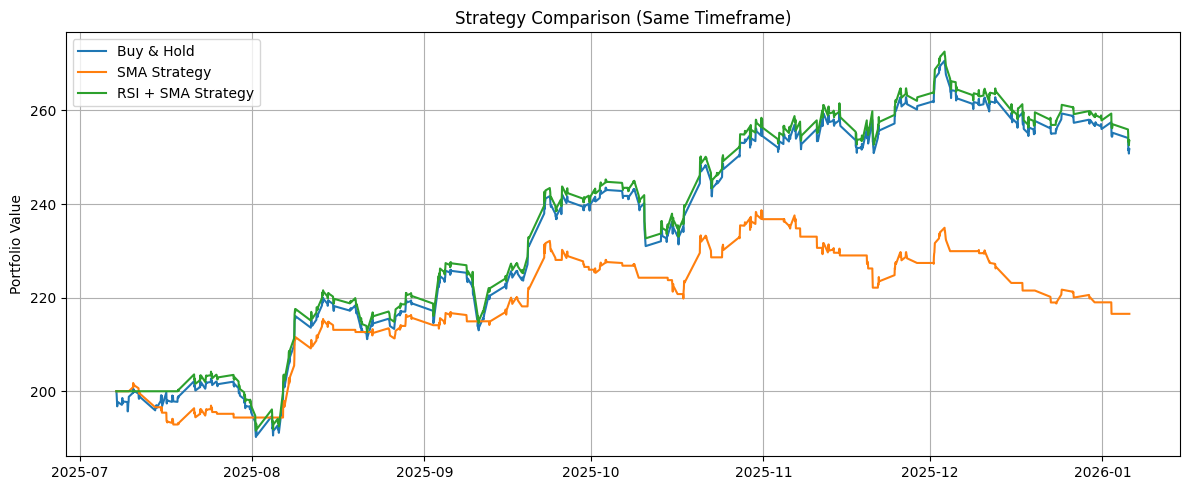

In [45]:
params = differents_timeframes[selected_view]

RSI_LOW  = params["rsi_low"]
RSI_HIGH = params["rsi_high"]


prices_aapl["Combined_Position"] = 0

# Condition d'achat
buy_signal = (
    (prices_aapl["Close"] > prices_aapl["SMA"]) &
    (prices_aapl["RSI"].shift(1) < RSI_LOW) &
    (prices_aapl["RSI"] >= RSI_LOW)
)

# Condition de vente
sell_signal = (
    (prices_aapl["RSI"].shift(1) > RSI_HIGH) &
    (prices_aapl["RSI"] <= RSI_HIGH)
) | (prices_aapl["Close"] < prices_aapl["SMA"])

prices_aapl.loc[buy_signal, "Combined_Position"] = 1
prices_aapl.loc[sell_signal, "Combined_Position"] = 0

# Maintien de la position
prices_aapl["Combined_Position"] = (
    prices_aapl["Combined_Position"]
    .replace(0, np.nan)
    .ffill()
    .fillna(0)
)

# Anti look-ahead
prices_aapl["Combined_Position_Shifted"] = (
    prices_aapl["Combined_Position"].shift(1).fillna(0)
)

prices_aapl["RSI_SMA_Strategy"] = (
    (1 + prices_aapl["Return"] * prices_aapl["Combined_Position_Shifted"])
    .fillna(1)
    .cumprod()
    * initial_capital
)


prices_aapl["Buy and Hold"] = (
    (1 + prices_aapl["Return"].fillna(0))
    .cumprod()
    * initial_capital
)

plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Buy and Hold"], label="Buy & Hold")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA_Strategy"], label="SMA Strategy")
plt.plot(prices_aapl["Datetime"], prices_aapl["RSI_SMA_Strategy"], label="RSI + SMA Strategy")

plt.title("Strategy Comparison (Same Timeframe)")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



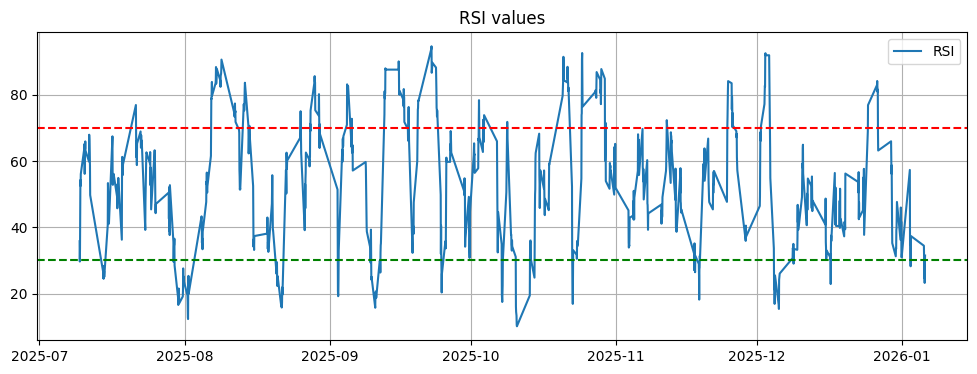

In [46]:
plt.figure(figsize=(12,4))
plt.plot(prices_aapl["Datetime"], prices_aapl["RSI"], label="RSI")
plt.axhline(30, linestyle="--", color="green")
plt.axhline(70, linestyle="--", color="red")
plt.title("RSI values")
plt.legend()
plt.grid(True)
plt.show()


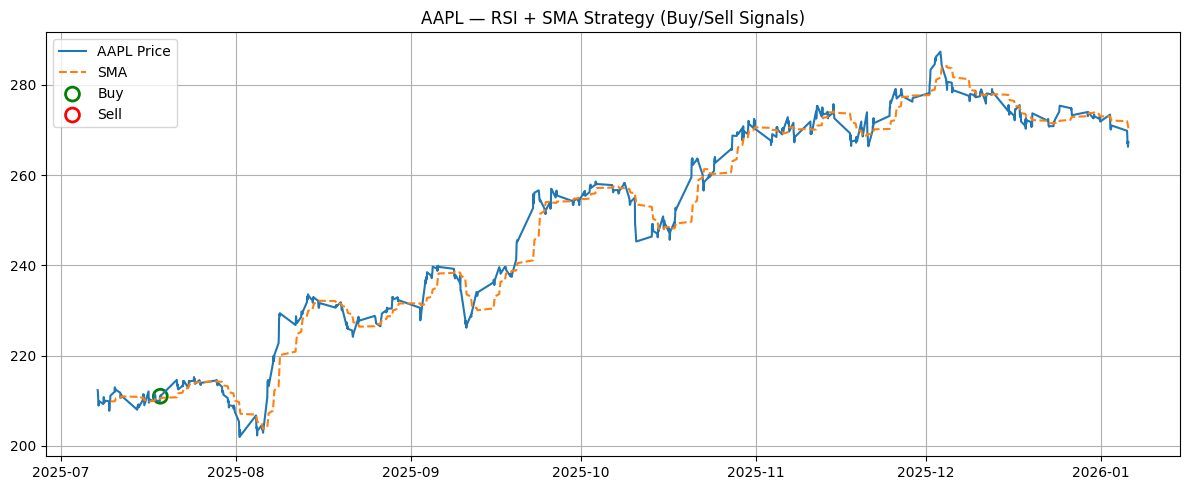

In [47]:
buy_points = prices_aapl.loc[
    prices_aapl["Combined_Position_Shifted"].diff() == 1
]

sell_points = prices_aapl.loc[
    prices_aapl["Combined_Position_Shifted"].diff() == -1
]


plt.figure(figsize=(12, 5))

# Prix et SMA
plt.plot(prices_aapl["Datetime"], prices_aapl["Close"], label="AAPL Price")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA"], label="SMA", linestyle="--")

# Cercles d'achat
plt.scatter(
    buy_points["Datetime"],
    buy_points["Close"],
    marker="o",
    s=100,
    edgecolors="green",
    facecolors="none",
    linewidths=2,
    label="Buy"
)

# Cercles de vente
plt.scatter(
    sell_points["Datetime"],
    sell_points["Close"],
    marker="o",
    s=100,
    edgecolors="red",
    facecolors="none",
    linewidths=2,
    label="Sell"
)

plt.title("AAPL — RSI + SMA Strategy (Buy/Sell Signals)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


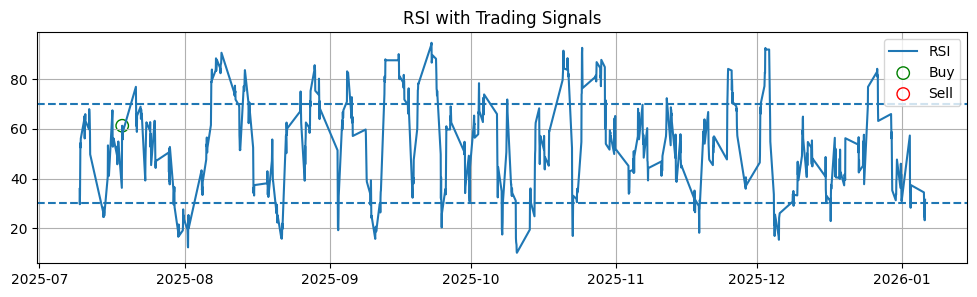

In [48]:



plt.figure(figsize=(12, 3))
plt.plot(prices_aapl["Datetime"], prices_aapl["RSI"], label="RSI")

plt.axhline(30, linestyle="--")
plt.axhline(70, linestyle="--")

plt.scatter(
    buy_points["Datetime"],
    buy_points["RSI"],
    marker="o",
    edgecolors="green",
    facecolors="none",
    s=80,
    label="Buy"
)

plt.scatter(
    sell_points["Datetime"],
    sell_points["RSI"],
    marker="o",
    edgecolors="red",
    facecolors="none",
    s=80,
    label="Sell"
)

plt.title("RSI with Trading Signals")
plt.legend()
plt.grid(True)
plt.show()
